In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')

In [109]:
encoder = LabelEncoder()
encoder.fit(['P', 'N'])

chips = pd.read_csv('chips.csv')
X = chips.drop('class', axis=1).to_numpy(dtype='float64')
y = chips['class'].to_numpy()
y = encoder.transform(y)

X, y

(array([[ 0.051267 ,  0.69956  ],
        [-0.092742 ,  0.68494  ],
        [-0.21371  ,  0.69225  ],
        [-0.375    ,  0.50219  ],
        [-0.51325  ,  0.46564  ],
        [-0.52477  ,  0.2098   ],
        [-0.39804  ,  0.034357 ],
        [-0.30588  , -0.19225  ],
        [ 0.016705 , -0.40424  ],
        [ 0.13191  , -0.51389  ],
        [ 0.38537  , -0.56506  ],
        [ 0.52938  , -0.5212   ],
        [ 0.63882  , -0.24342  ],
        [ 0.73675  , -0.18494  ],
        [ 0.54666  ,  0.48757  ],
        [ 0.322    ,  0.5826   ],
        [ 0.16647  ,  0.53874  ],
        [-0.046659 ,  0.81652  ],
        [-0.17339  ,  0.69956  ],
        [-0.47869  ,  0.63377  ],
        [-0.60541  ,  0.59722  ],
        [-0.62846  ,  0.33406  ],
        [-0.59389  ,  0.005117 ],
        [-0.42108  , -0.27266  ],
        [-0.11578  , -0.39693  ],
        [ 0.20104  , -0.60161  ],
        [ 0.46601  , -0.53582  ],
        [ 0.67339  , -0.53582  ],
        [-0.13882  ,  0.54605  ],
        [-0.29

In [110]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

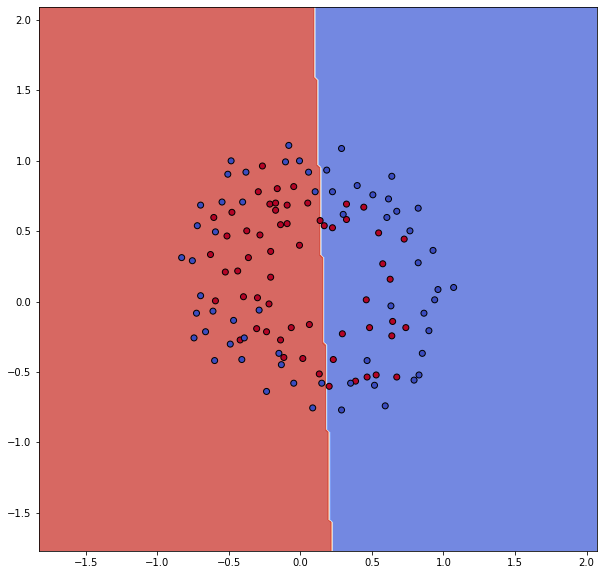

In [111]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()